# Impulso Invariante - Filtro Butterworth
Respuesta en frecuencia de filtros Butterworth de orden $n$
$$|H(\Omega)|^2 = \frac{1}{1+(\Omega / \Omega_c)^{2n}} ,$$
donde $\Omega_c$ es la frecuencia de corte.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Diseñando un Filtro Butterworth
fs = 1
T = 1/fs

fc = 0.2
omg_c = 2*np.pi*fc
n_order = 4


# Polos del filtro Butterworth (x^(2n) + 1 = 0)
coef = np.zeros(2*n_order+1)
coef[0] = 1
coef[2*n_order] = 1
roots = np.roots(coef)

# Se seleccionan los polos en el lado izquierdo del plano-s (Re{s_k}<0)
s_roots = np.sort_complex(roots*1j*omg_c)
print(s_roots)

[-1.16098126-0.48089418j -1.16098126+0.48089418j -0.48089418-1.16098126j
 -0.48089418+1.16098126j  0.48089418+1.16098126j  0.48089418-1.16098126j
  1.16098126+0.48089418j  1.16098126-0.48089418j]


Filtro Butterworth de orden $n$ expresado en fracciones parciales
$$H(s) = A\prod_{k=1}^{n} \frac{1}{s-s_k} = \sum_{k=1}^{n} \frac{c_k}{s-s_k} .$$

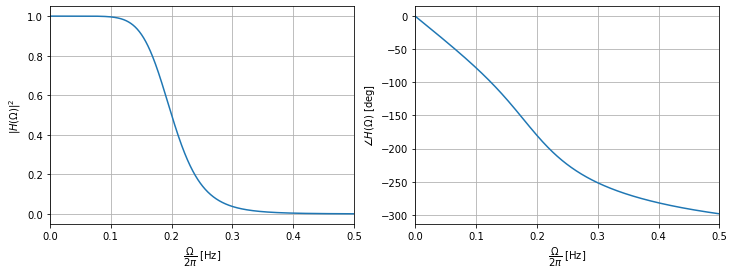

In [3]:
N = 1000
omg = np.arange(N)/N*(np.pi*fs)

# Calculando coeficientes de la expansión en fracciones parciales
ck = np.ones(n_order,dtype=complex) * omg_c
for k in range(n_order):    
    for l in range(n_order):
        if k!=l:
            ck[k] = ck[k]*omg_c/(s_roots[k]-s_roots[l])

# Calculando la respuesta en frecuencia
Homg = 0
for k in range(n_order):    
    Homg = Homg + ck[k]/(1j*omg-s_roots[k])

fig = plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(omg/(2*np.pi),np.abs(Homg)**2)
plt.xlim([0,fs/2])
plt.xlabel('$\dfrac{\Omega}{2\pi}$ [Hz]')
plt.ylabel('$|H(\Omega)|^2$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(omg/(2*np.pi),np.unwrap(np.angle(Homg))*180/np.pi)
plt.xlim([0,fs/2])
plt.xlabel('$\dfrac{\Omega}{2\pi}$ [Hz]')
plt.ylabel('$\\angle H(\Omega)$ [deg]')
plt.grid('on')


Aplicando la transformación de los polos del plano-$s$ al plano-$z$, $z_k = e^{s_k T}$, podemos encontrar la función de transferencia
$$H(z) = \sum_{k=1}^{n_p} \frac{c_k}{1-e^{s_k T}z^{-1}}. $$
Luego encontramos la respuesta en frecuencia $H(\omega)$
$$ H(\omega) = H(z)|_{z=e^{j\omega}} .$$

[0.27765851-0.14486775j 0.27765851+0.14486775j 0.24632752-0.56703748j
 0.24632752+0.56703748j]


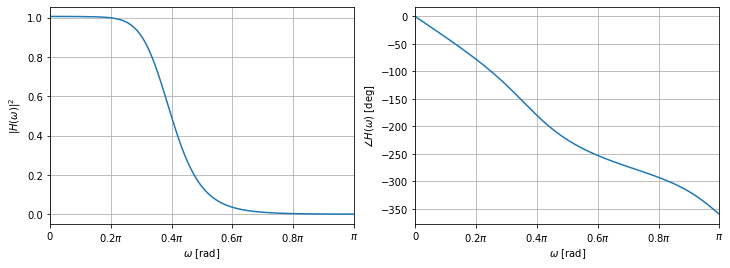

In [4]:
# Calculando el filtro discreto H(z)
N = 1000

w = np.arange(N)/N*(np.pi)
z_roots = np.exp(s_roots[0:n_order]/fs)
print(z_roots)

Hw = 0
for k in range(n_order):
    Hw = Hw + ck[k]/(1-z_roots[k]*np.exp(-1j*w))

fig = plt.figure(figsize=[12,4])

xticks = [0,0.2*np.pi,0.4*np.pi,0.6*np.pi,0.8*np.pi,np.pi]
xticklab = ['0','$0.2\pi$','$0.4\pi$','$0.6\pi$','$0.8\pi$','$\pi$']

plt.subplot(1,2,1)
plt.plot(w,np.abs(Hw)**2)
plt.xlim([0,np.pi])
plt.xticks(xticks,labels=xticklab)
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$|H(\omega)|^2$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(w,np.unwrap(np.angle(Hw))*180/np.pi)
plt.xlim([0,np.pi])
plt.xticks(xticks,labels=xticklab)
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$\\angle H(\omega)$ [deg]')
plt.grid('on')


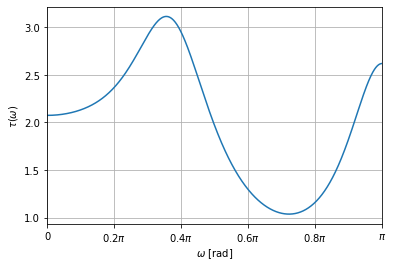

In [5]:
# Calculando retardo de grupo
dw = 1/N*(np.pi)
tau_w = -np.angle(Hw[1:N]/Hw[0:N-1])/dw
w1 = (w[0:N-1]+w[1:N])/2

fig = plt.figure()

plt.plot(w1,tau_w)
plt.xlim([0,np.pi])
plt.xticks(xticks,labels=xticklab)
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$\\tau(\omega)$')
plt.grid('on')
